In [11]:
#%pip install --upgrade huggingface_hub

In [7]:
from huggingface_hub import scan_cache_dir, hf_hub_download

!huggingface-cli scan-cache -vvv

⚠️  Warning: 'huggingface-cli scan-cache' is deprecated. Use 'hf cache scan' instead.
REPO ID                                     REPO TYPE REVISION                                 SIZE ON DISK NB FILES LAST_MODIFIED REFS LOCAL PATH                                                                                                                                  
------------------------------------------- --------- ---------------------------------------- ------------ -------- ------------- ---- ------------------------------------------------------------------------------------------------------------------------------------------- 
Linq-AI-Research/FinanceRAG                 dataset   ba6f7470152e76b389ad48e3997f15381e6aecae        19.3M       16 9 months ago  main /home/ubuntu/.cache/huggingface/hub/datasets--Linq-AI-Research--FinanceRAG/snapshots/ba6f7470152e76b389ad48e3997f15381e6aecae               
autogluon/chronos_datasets                  dataset   eeecad0b82a8c237e212ce6f8d1ab

In [4]:
scan_cache_dir().delete_revisions(
'dbd91bbaf64a0e591f4340ce8b66fd1dba9ab6bd',
).execute()

In [3]:
import os
os.getcwd()

'/home/ubuntu/Jing/Detector'

In [1]:
!which python

/home/ubuntu/anaconda3/envs/graphDL/bin/python


In [2]:
from src.ai_detector.detector import Detector
from IPython.display import display, Markdown
import pandas
import glob
import seaborn
from tqdm import tqdm
%reload_ext autoreload
%autoreload 2

/home/ubuntu/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
detector = Detector(observer_name_or_path="google/gemma-2b",
              performer_name_or_path="google/gemma-2b-it",
              mode='accuracy',
             )

Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.26s/it]


In [5]:
doc ="""
In recent years, we've witnessed a remarkable shift in the landscape of artificial intelligence, particularly with the advent of Generative AI (GenAI) and Large Language Models (LLMs). These technologies are not just transforming how we approach complex and open-ended tasks, but they're also reshaping the very foundations of knowledge work and quality assessment. Let's delve into the key aspects of this AI revolution.
"""

doc = '''
We are witnessing a paradigm shift, as driving by this wave of Generative AI.  These new technologies are not only transforming how we approach complex and open-ended tasks with human natural language, but also reshaping our interactions with knowledge, in turn, influencing the evolution of AI itself. As knowledge workers, our adoption of LLMs is partly motivated by necessity, given that human labor is prohibitively difficult to scale. Traditional methods that rely on gold references or “vibe checks" have become less effective at distinguishing good content from low-quality material.  In this blog, we will explore several tasks where we have innovated the usage of AI to improve efficiency and effectiveness. Also, address some of the difficulties we encounters, areas for improvement and potential opportunities for future.

Data Annotation for model training
Data quality is the determining factor in model quality. In the past, data collection and cleaning involved tedious, time-consuming processes with heavily humans involved. LLMs that trained with human feedback excel at mapping inputs to desired outputs. By leveraging LLMs, we have automated majority of the data annotation for NLP tasks such as Named Entity Recognition (NER) and Relation Extraction (RE). However, the LLMs are compelled to generate - even in the cases of insensible questions or null values - this can lead to low recall compared to human annotated data. One solution to address this overconfidence is to incentivize negative responses. 

A/B testing to benchmark models
A/B testing is commonly used to compare two versions of products where there isn’t a ground truth or consensus. LLMs that are aligned with human preferences performs exceptionally well in these types of tasks. In selecting models for knowledge transferring,  we are left in the dark to select the right baseline to start with, due to the lack of transparency in pre-training and benchmarking of the foundational models. We adopt the A/B testing in model evaluation, that let the LLM chooses the preferred outcome. This strategy helps us identify best base models and hyperparameters during training. Nevertheless, the risk of validation with AI lies in that it works only with LLMs that are much more powerful than the examined models. With open-sourced models catching up, the reliability of this supervision decreases, and requires continuous human involvement.

Contextual entity linking
Disambiguate entities across different entity stores appears to be an unattainable task for a single model. Entity linking requires a system capable of managing the complexity. In our EL model development, the challenge arises from lack of  ground truth for training such system, along with varying formats of the incoming data. LLMs, with their language understanding capabilities, can disambiguate entities that may have different interpretations based on the context.  One caveat with the AI assisted entity linking is its lack of flexibility, as humans are required to define the  metrics. We are working on implementing the automated process where high-level instructions enable AI to dynamically determine which aspects to focus on when facing new scenarios and data deficiency. 

Open-ended RAG Evaluation
Similar to the contextual entity linking, the sheer amount of data, the lack of ground truth or domain expert guidance, makes it difficult to evaluate a RAG pipeline, also has to account for the obsolete benchmark datasets. We have experimented with evaluation techniques aided by LLMs, and the results have been encouraging. It expedites 90% of the workflow by processing dense information. A highlight of the innovation is introducing an agentic workflow that dynamically selects the  search bases and evaluate both retrieval and generation. However, a potential risk with this hands-off experimentation is the danger of “not knowing what you don’t know”.

Ontology Engineering
Ontologies are structured frameworks for organizing information, often used in data integration, representation, and semantic web applications. Designing ontologies often requires domain expertises to understand related concepts. Generative AI can assist in analyzing existing datasets and suggesting structures based on patterns and relationships it identifies. It is worth noting that the design should always consider end-user applications and their preferences, which once again required human oversight and refinement of the framework.
'''
doc='''

I am happy to join with you today in what will go down in history as the greatest demonstration for
freedom in the history of our nation.
Five score years ago a great American in whose symbolic shadow we stand today signed the
Emancipation Proclamation. This momentous decree is a great beacon light of hope to millions of Negro
slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the
long night of their captivity. But 100 years later the Negro still is not free. One hundred years later the
life of the Negro is still badly crippled by the manacles of segregation and the chains of discrimination.
One hundred years later the Negro lives on a lonely island of poverty in the midst of a vast ocean of
material prosperity. One hundred years later the Negro is still languished in the corners of American
society and finds himself in exile in his own land. So we’ve come here today to dramatize a shameful
condition.

I say to you today, my friends, though, even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream. I have a dream that one day this nation will rise up, live out the true meaning of its creed: “We hold these truths to be self-evident, that all men are created equal.”

I have a dream that one day on the red hills of Georgia sons of former slaves and the sons of former
slave-owners will be able to sit down together at the table of brotherhood. I have a dream that one day
even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of
oppression, will be transformed into an oasis of freedom and justice.

I have a dream that my four little children will one day live in a nation where they will not be judged by
the color of their skin but by the content of their character. I have a dream . . . I have a dream that one
day in Alabama, with its vicious racists, with its governor having his lips dripping with the words of
interposition and nullification, one day right there in Alabama little black boys and black girls will be able
to join hands with little white boys and white girls as sisters and brothers.

In recent years, we've witnessed a remarkable shift in the landscape of artificial intelligence, particularly with the advent of Generative AI (GenAI) and Large Language Models (LLMs). These technologies are not just transforming how we approach complex and open-ended tasks, but they're also reshaping the very foundations of knowledge work and quality assessment. Let's delve into the key aspects of this AI revolution.


Data quality is the determining factor in model quality. In the past, data collection and cleaning involved tedious, time-consuming processes with humans heavily involved. LLMs that trained with human feedback excel at mapping inputs to desired outputs. By leveraging LLMs, we have automated majority of the data annotation for NLP tasks such as Named Entity Recognition (NER) and Relation Extraction (RE). However, the LLMs are compelled to generate - even in the cases of insufficient context information or ill-posed questions - this can lead to low recall compared to human annotation. One solution to address this overconfidence is to incentivize negative responses.


A/B test is used to experiment on two versions of products where there isn’t a ground truth or consensus. LLMs that are aligned with human preferences perform exceptionally well in these types of tasks. In evaluating open-sourced models for our own knowledge functions, we are left in the dark to determine the right baseline to start with, due to the lack of transparency in pre-training and benchmarking of the foundational models. We adopt the A/B testing in model evaluation letting the LLM choose the preferred outcome. This strategy helps us identify the right base models and hyperparameters during training. Nevertheless, the risk of validation with AI lies in that it works only with LLMs that are much more powerful than the models under examination. With open-sourced models catching up, the reliability of this supervision decreases, and requires continuous human involvement.


Disambiguating entities between entity stores and different sources appears to be an unattainable task for a single ML model. Entity linking requires a system capable of managing the complexity within the data. In our EL model development, the challenge arises from a lack of ground truth for training such system, along with varying formats of the incoming data. LLMs, with their superb language understanding capabilities, can disambiguate entities that may have different interpretations based on the context. One caveat with the AI assisted entity linking is its lack of flexibility, as humans are required to define the metrics. We are working on implementing the automated process where high-level instructions enable AI to determine which aspects to focus on when facing new scenarios and data deficiency.
'''

doc = '''
Revolutionizing Video Summarization with Multimodal Language Model
In the ever-expanding digital landscape, the sheer volume of video content on social media platforms like TikTok and Instagram presents a significant challenge. With countless hours of footage uploaded daily, efficiently extracting meaningful insights from these videos has become crucial for businesses, marketers, content creators, and researchers. 
Recently, advancements in Multimodal Large Language Models (MLLMs) have opened up new possibilities in the field of video processing. These models, traditionally known for their ability to integrate and understand textual and visual data, can be extended to the video domain with the goal of creating a seamless integration of visual, audio, and metadata  (such as hashtags and descriptions), resulting in more comprehensive video summaries that can capture the full context of the content.
Generating Comprehensive Video Summaries:

Video is a sum total of the visual, audio or even the textual content available in it. Unlike traditional summarization methods that focus solely on visual content, new approaches integrate audio and other available modalities within the video as well. This ensures that the summaries consist of  information about all the elements , offering a more complete understanding of the video’s content.
Imagine a 30-second summary of a 10-minute video that captures all the essential elements—the key visuals, important dialogue, and even the contextual information from hashtags or descriptions. This kind of summary allows users to quickly grasp the essence of the video without having to watch the entire clip, making content more accessible and easier to digest.
Extracting Key Features for Insightful Analysis:

Beyond creating summaries, the focus can also be on extracting key features from videos. This feature extraction is crucial for providing deeper insights into video content. By identifying important objects, actions, and even sentiment within the audio, the technology empowers users to analyze content on a much more granular level.
For marketers, this means quickly identifying trending topics or popular content themes. Content creators can use these insights to refine their strategies, ensuring their videos resonate with their audience. Researchers, on the other hand, can gain a deeper understanding of social media trends, user behavior, and the impact of various content types.
Leveraging the Power of Multimodal Large Language Models:

The backbone of these innovations lies in the capabilities of Multimodal Large Language Models. MLLMs are trained to process and integrate information from multiple data modalities—text, images, and audio—simultaneously. By integrating these different modalities, MLLMs understand and generate content that is contextually rich and semantically meaningful across different modalities. 
For example, consider a popular TikTok video featuring a viral dance, a trending song, and specific hashtags. A traditional text-based model might excel in generating coherent sentences but would struggle to understand the content of a video without accompanying text. An MLLM, however, can analyze the visual aspects of the video, interpret spoken words, and incorporate metadata (such as hashtags and descriptions) to produce a more comprehensive understanding of the content.
Navigating the Fast-Paced World of Social Media:

In the fast-paced world of social media, where trends can change in the blink of an eye, having tools that offer quick and accurate insights is invaluable. These advanced video summarization pipelines can be designed to help users navigate this dynamic environment with precision.
For businesses, this means being able to quickly identify emerging trends and tailor their marketing strategies accordingly. Content creators can optimize their videos based on detailed feedback, ensuring they stay relevant and engaging. Researchers can analyze social media content with unprecedented depth, uncovering patterns and insights that were previously difficult to detect.
The Future of Video Summarization:

As the development of these video processing pipelines continues, the potential applications are vast. From improving content recommendations to enhancing search capabilities, the ability to generate comprehensive video summaries and extract key features is poised to transform how video content is consumed and analyzed.
In summary, the integration of Multimodal Large Language Models into video processing represents a significant leap forward in making video content more accessible, understandable, and actionable. As this technology evolves, it promises to revolutionize the way marketers, content creators, and researchers interact with video content, providing them with the tools they need to succeed in an increasingly digital world.
'''




doc = '''
You’ve likely seen the image, shared widely across X and Reddit. It presents a visual interperation: “There is more diversity of thoughts on the political Right than on the political Left.” The graph (Figure 1) depicts a network consisting of a small cluster of “Left” beliefs and a widely spread cluster of “Right” beliefs, suggesting the latter is more ideologically diverse.

Although the political claim on social media is provocative. It is not the interest of this post, the intriguing parts are data and analysis that underpins it. So i dug into the original scientific publication and repeated the analyses. A close examination reveals that this figure is an interpretation of a flawed visualization.

The analysis in the British Journal of Social Psychology paper (Lüders et al. 2024) uses a technique called a Response-Item Network (ResIN, Carpentras el al. 2021). It starts with standard survey data, where respondents choose an option from a scaled list (e.g., strongly agree, agree, neutral, disagree, strongly disagree). Here’s an unconventional step: instead of treating the answers a node taking ordinal values, the method breaks them apart. Each response to each item becomes its own independent node in a network. For example, a question on abortion with 5 possible answers results in five separate nodes. A survey with 10 questions would generate a complex network of 50 nodes.

The connectivity, or edge weight, between any two nodes is determined by their correlation. Essentially, how many people in the survey selected those specific answers pair simultaneously. This co-occurrence correlation becomes the “edge strength.”

This is where the viral image begins to unravel. Before stylizing the network to a graph. Let’s look at the underlying correlation data itself. The map below (Figure 2 top) shows the co-occurrence count between every pair of attitudes. The darker the square, the more frequently those two attitudes were chosen together. Note that lots of pair-attitudes have zero values, due to the fact they are mutual-exclusive responses to the same question.

The attitudes have been ordered based on the respondents’ average rating towards the Republican Party (yes, this was another item-response in the survey), creating a rough Left-to-Right spectrum from top-left to bottom-right. Reading the heatmap, the attitudes associated with the Left (the top-left corner) form a dense block of dark blue, indicating a highly interconnected and consistent belief system. In contrast, the attitudes associated with the Right show less frequent co-occurrence. The responses appear more diffuse, not necessarily more “diverse” in the way one might think of a set of ideas, which would be another dense area on the correlation map.
'''

doc = '''
In today's digital landscape, where social media reigns supreme as the epicenter of content creation, marketing, and trend tracking, the pivotal role of video content cannot be overstated. Platforms like TikTok have revolutionized how we consume and engage with content, presenting both challenges and opportunities for marketers and creators alike. In this dynamic environment, deciphering the nuances of video content is paramount, as it is key to unlocking audience engagement, driving trends, and shaping brand narratives. Amidst the sheer volume of videos flooding these platforms daily, the need for sophisticated video understanding tools has never been more acute. Beyond simply viewing videos, marketers and content creators must navigate a complex landscape, deciphering what content resonates with audiences and why. This requires more than surface-level analysis; it demands a deep understanding of the underlying patterns, themes, and emotions that drive viewer engagement.

Enter video understanding technologies. By leveraging intelligent analysis techniques, these tools offer marketers and creators a powerful ally in deciphering the intricacies of video content. From sentiment analysis to trend detection, these systems can uncover valuable insights buried within the vast sea of videos, enabling users to identify emerging trends, understand audience preferences, and craft content that resonates on a deeper level. As shown in the figure below, the landscape of video understanding has evolved significantly over the past few years. 
'''

texts = doc.split('\n\n')
prediction=[]
for text in texts:
    text = text.strip()
    if text:
        result = detector.predict(text, display_text=False, threshold=0.01)
        if result['prediction'].startswith('AI'):
            display(Markdown(result['colored_text']))
        else:
            display(Markdown(result['text']))
        
        print(f"Score: {result['score'] :.3f}, Confidence: {result['confidence']:.3f}, Prediction: {result['prediction']}")
        prediction.append(result)
        print('='*70)
        

 In <span style='background-color: #FFFF00'>today</span> ' s digital <span style='background-color: #FFFF00'>landscape</span> , where <span style='background-color: #FFFF00'>social</span> media <span style='background-color: #FFFF00'>reigns</span> supreme as the <span style='background-color: #FFFF00'>epic</span> enter of content creation , marketing , and trend <span style='background-color: #FFFF00'>tracking</span> , the <span style='background-color: #FFFF00'>pivotal</span> role of video content <span style='background-color: #FFFF00'>cannot</span> be <span style='background-color: #FFFF00'>over</span> <span style='background-color: #FFFF00'>stated</span> . <span style='background-color: #FFFF00'>Platforms</span> like TikTok have <span style='background-color: #FFFF00'>revolution</span> ized how we consume and <span style='background-color: #FFFF00'>engage</span> with <span style='background-color: #FFFF00'>content</span> , presenting both <span style='background-color: #FFFF00'>challenges</span> and opportunities for marketers and creators <span style='background-color: #FFFF00'>alike</span> . In this dynamic <span style='background-color: #FFFF00'>environment</span> , <span style='background-color: #FFFF00'>deci</span> <span style='background-color: #FFFF00'>ph</span> ering the nuances of video content is paramount , as it is <span style='background-color: #FFFF00'>key</span> to unlocking audience engagement , driving <span style='background-color: #FFFF00'>trends</span> , and shaping brand narratives . Amid st the sheer volume of videos flooding these platforms <span style='background-color: #FFFF00'>daily</span> , the need for sophisticated video understanding tools has <span style='background-color: #FFFF00'>never</span> been more <span style='background-color: #FFFF00'>acute</span> . Beyond simply viewing videos , marketers and <span style='background-color: #FFFF00'>content</span> creators must navigate a complex landscape , <span style='background-color: #FFFF00'>deci</span> <span style='background-color: #FFFF00'>ph</span> ering what content resonates with audiences and why . This requires <span style='background-color: #FFFF00'>more</span> than <span style='background-color: #FFFF00'>surface</span>  level analysis ; it demands a deep <span style='background-color: #FFFF00'>understanding</span> of the underlying patterns , <span style='background-color: #FFFF00'>themes</span> , and emotions that drive viewer engagement

Score: 0.687, Confidence: 1.000, Prediction: AI-generated


 Enter video understanding technologies . By leveraging intelligent analysis techniques , these tools offer marketers and creators a powerful ally in <span style='background-color: #FFFF00'>deci</span> <span style='background-color: #FFFF00'>ph</span> ering the <span style='background-color: #FFFF00'>intricacies</span> of <span style='background-color: #FFFF00'>video</span> content . From <span style='background-color: #FFFF00'>sentiment</span> analysis to trend detection , these systems can uncover <span style='background-color: #FFFF00'>valuable</span> insights <span style='background-color: #FFFF00'>buried</span> within the vast <span style='background-color: #FFFF00'>sea</span> of videos , enabling <span style='background-color: #FFFF00'>users</span> to identify <span style='background-color: #FFFF00'>emerging</span> trends , understand audience <span style='background-color: #FFFF00'>preferences</span> , and craft <span style='background-color: #FFFF00'>content</span> <span style='background-color: #FFFF00'>that</span> resonates on a <span style='background-color: #FFFF00'>deeper</span> <span style='background-color: #FFFF00'>level</span> . As shown in the figure <span style='background-color: #FFFF00'>below</span> , the <span style='background-color: #FFFF00'>landscape</span> of video understanding has evolved significantly <span style='background-color: #FFFF00'>over</span> the past few years

Score: 0.694, Confidence: 1.000, Prediction: AI-generated


In [21]:
df.prediction.value_counts(), df.score.mean()

(prediction
 AI-generated    1
 Name: count, dtype: int64,
 0.8004236817359924)

In [7]:
filenames = []
for folder in ['gpt', 'human']:
    filenames.extend(glob.glob(f'data/gptzero/{folder}/*.txt') )
len(filenames)

100

In [8]:
results = []
for file in tqdm(filenames):
    with open(file, 'r') as f:
        lines = f.readlines()
        text = ' '.join(lines)
        results.append({'file':file} | detector.predict(text))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


In [9]:
df = pandas.DataFrame(results)
df['True Label'] = df.file.apply(lambda x: 'Human' if x.split('/')[-2]=='human' else 'AI')
df['pred'] = df.prediction.apply(lambda x: x.split('-')[0])
df

,file,prediction,score,confidence,colored_text,text,True Label,pred
0,data/gptzero/gpt/35.txt,AI-generated,0.836557,0.824870,<span style='background-color: #FFFF00'>Tweet...,Tweet: Study reveals that dogs can understand ...,AI,AI
1,data/gptzero/gpt/29.txt,AI-generated,0.748923,1.000000,One <span style='background-color: #FFFF00'>c...,One craft that originated in Egypt is the art ...,AI,AI
2,data/gptzero/gpt/44.txt,AI-generated,0.660029,1.000000,The technology of the future will change <spa...,The technology of the future will change our l...,AI,AI
3,data/gptzero/gpt/28.txt,AI-generated,0.617701,1.000000,# The <span style='background-color: #FFFF00'...,# The Impact of Global Warming on the Environm...,AI,AI
4,data/gptzero/gpt/41.txt,AI-generated,0.737520,1.000000,Temperature <span style='background-color: #F...,Temperature has a direct impact on the rate of...,AI,AI
...,...,...,...,...,...,...,...,...
95,data/gptzero/human/34.txt,Human-generated,0.933830,0.661493,The <span style='background-color: #FFFF00'>t...,The thing I picked up on here is how you focus...,Human,Human
96,data/gptzero/human/1.txt,Human-generated,0.945026,0.717475,A US <span style='background-color: #FFFF00'>...,A US bank has said it will donate more than $8...,Human,Human
97,data/gptzero/human/39.txt,Human-generated,0.970988,0.847286,It <span style='background-color: #FFFF00'>de...,It depends on the language. It’s basically wha...,Human,Human
98,data/gptzero/human/13.txt,Human-generated,0.959963,0.792159,Ex No <span style='background-color: #FFFF0...,Ex-No 10 media chief Alastair Campbell is at t...,Human,Human


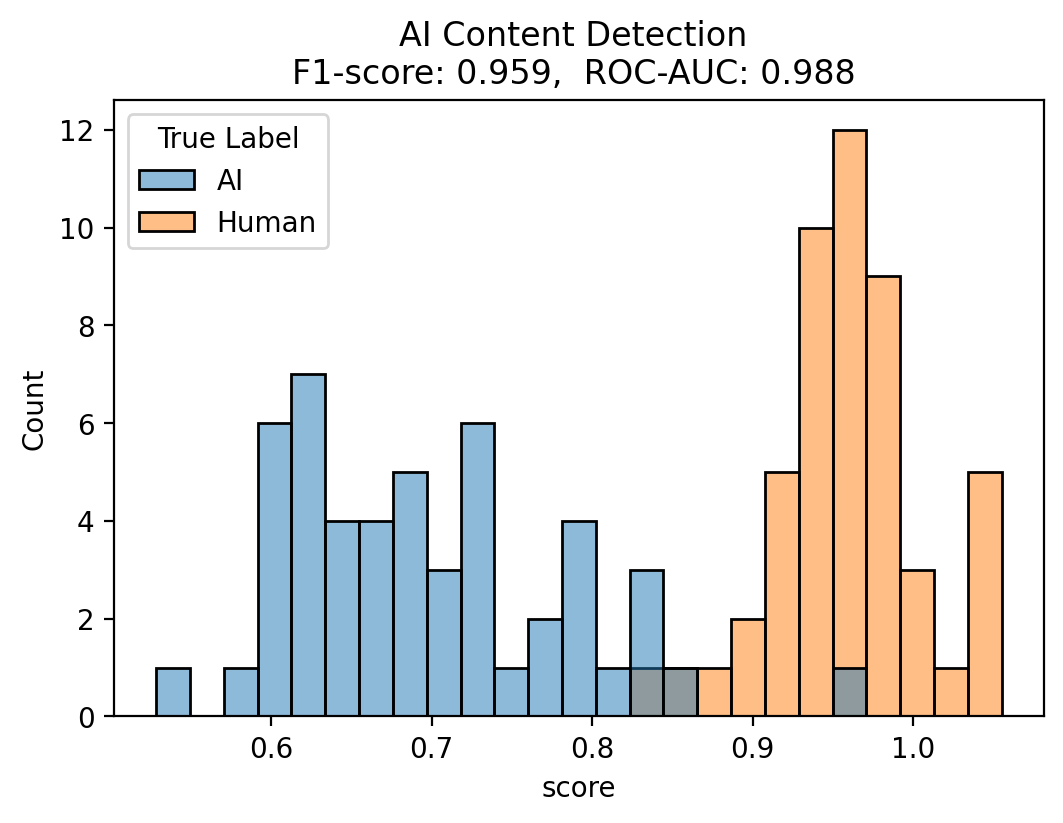

In [10]:
from sklearn.metrics import roc_auc_score, f1_score
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6,4), dpi=200)

auc = roc_auc_score(df['True Label'], df['score'])
f1 = f1_score(df['True Label']=='Human', df.pred=='Human')

seaborn.histplot(df, x='score', bins=25, hue='True Label')
plt.title(f"AI Content Detection \nF1-score: {f1:.3f},  ROC-AUC: {auc:.3f} ")
plt.savefig('score.png', bbox_inches='tight')